<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/bdm/Thruth%20Archive/compare_big_data_by_Thruth_Archive_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**2019 Airline Delays w/Weather and Airport Detail**
Classification dataset which includes aircraft, weather, airport, and employment.
In this Exploratory Data Analysis (EDA), we delve into the Airline Cancellation dataset using Pandas, a parallel computing library that enhances the efficiency of our data exploration. Our aim is to uncover insights that shed light on the patterns and factors associated with flight cancellations, providing a foundation for improving operational resilience in the airline industry.

Pandas has become an important tool for handling big data and complex computations in the realm of data science. Its ease of use, efficient data structures, and a rich set of functions for data cleaning, preprocessing, merging, and analysis make it a versatile and powerful library. As the volume and complexity of data continue to grow, Pandas remains a reliable ally for data professionals seeking to extract meaningful insights and drive informed decision-making from vast and intricate datasets.

**PROJECT TEAM:**<br>
HAZEM TAHER OMRAN FENNEER<br>
SHIVANESH A/L SIVAKUMAR<br>
NUR SHAHIRAH JAILANI<br>
MUSTAFA GHAZI TALAB<br>

## **Downloading the Dataset**

We downloaded the dataset in Kaggle, first we link this project with google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Assignment 6"

In [ ]:
!kaggle datasets download -d threnjen/2019-airline-delays-and-cancellations

 98% 735M/754M [00:09<00:00, 57.7MB/s]
100% 754M/754M [00:09<00:00, 81.1MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  2019-airline-delays-and-cancellations.zip
  inflating: full_data_flightdelay.csv  
  inflating: raw_data/AIRPORT_COORDINATES.csv  
  inflating: raw_data/B43_AIRCRAFT_INVENTORY.csv  
  inflating: raw_data/CARRIER_DECODE.csv  
  inflating: raw_data/GHCND_documentation.pdf  
  inflating: raw_data/ONTIME_REPORTING_01.csv  
  inflating: raw_data/ONTIME_REPORTING_02.csv  
  inflating: raw_data/ONTIME_REPORTING_03.csv  
  inflating: raw_data/ONTIME_REPORTING_04.csv  
  inflating: raw_data/ONTIME_REPORTING_05.csv  
  inflating: raw_data/ONTIME_REPORTING_06.csv  
  inflating: raw_data/ONTIME_REPORTING_07.csv  
  inflating: raw_data/ONTIME_REPORTING_08.csv  
  inflating: raw_data/ONTIME_REPORTING_09.csv  
  inflating: raw_data/ONTIME_REPORTING_10.csv  
  inflating: raw_data/ONTIME_REPORTING_11.csv  
  inflating: raw_data/ONTIME_REPORTING_12.csv  
  inflating: raw_data/ONTIME_REPORTING_2020_01.csv  
  inflating: raw_data/ONTIME_REPORTING_2020_02.csv  
  inflating: raw_data/ONTIME_REPORT

The dataset has been downloaded and extracted.

Now we start with the project.
Starting with importing the needed libraries

In [ ]:
import numpy as np
import pandas as pd
import psutil
import time
import os

Setting the file path

In [ ]:
file_path='/content/train.csv'

Here, we use Pandas to read a CSV file into a DataFrame (df).

In [ ]:
%%time
df = pd.read_csv(file_path)

CPU times: user 13.8 s, sys: 3.22 s, total: 17 s
Wall time: 20 s


Next step

In [ ]:
%%time
df

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.48 µs


,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
0,7,7,0,1500-1559,3,3,26,160,American Airlines Inc.,19534,...,Chicago O'Hare International,0.00,0.0,0.0,95.0,4.25,0.237709,0.273236,0.222538,0.255479
1,4,1,0,1300-1359,4,4,63,50,SkyWest Airlines Inc.,18788,...,El Paso International,0.00,0.0,0.0,71.0,11.41,0.154651,0.121849,0.237972,0.197503
2,11,4,0,0001-0559,2,1,3,76,American Eagle Airlines Inc.,1148,...,NONE,0.00,0.0,0.0,54.0,0.45,0.117559,0.187867,0.139886,0.060327
3,3,2,0,1500-1559,7,5,14,143,Southwest Airlines Co.,7612,...,San Jose International,0.00,0.0,0.0,64.0,8.05,0.204389,0.141446,0.132868,0.202037
4,7,3,0,0800-0859,1,2,85,50,American Eagle Airlines Inc.,29376,...,Cincinnati/Northern Kentucky International,0.01,0.0,0.0,94.0,10.51,0.203263,0.193761,0.203027,0.113050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4542338,6,4,0,1500-1559,2,5,4,70,Comair Inc.,1190,...,Philadelphia International,0.00,0.0,0.0,86.0,4.92,0.217198,0.222554,0.251477,0.292230
4542339,4,4,1,2100-2159,2,9,12,143,Southwest Airlines Co.,5669,...,Austin - Bergstrom International,0.00,0.0,0.0,85.0,8.05,0.215726,0.192585,0.171317,0.263840
4542340,4,7,1,1900-1959,6,5,21,175,Southwest Airlines Co.,14827,...,Portland International,0.00,0.0,0.0,89.0,4.03,0.215726,0.112840,0.203724,0.266095
4542341,12,7,0,2000-2059,3,6,69,110,Delta Air Lines Inc.,13603,...,Douglas Municipal,0.38,0.0,0.0,44.0,9.17,0.157390,0.186040,0.226980,0.286800


In [ ]:
%%time

df.head(5)

CPU times: user 205 µs, sys: 0 ns, total: 205 µs
Wall time: 198 µs


,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
0,7,7,0,1500-1559,3,3,26,160,American Airlines Inc.,19534,...,Chicago O'Hare International,0.00,0.0,0.0,95.0,4.25,0.237709,0.273236,0.222538,0.255479
1,4,1,0,1300-1359,4,4,63,50,SkyWest Airlines Inc.,18788,...,El Paso International,0.00,0.0,0.0,71.0,11.41,0.154651,0.121849,0.237972,0.197503
2,11,4,0,0001-0559,2,1,3,76,American Eagle Airlines Inc.,1148,...,NONE,0.00,0.0,0.0,54.0,0.45,0.117559,0.187867,0.139886,0.060327
3,3,2,0,1500-1559,7,5,14,143,Southwest Airlines Co.,7612,...,San Jose International,0.00,0.0,0.0,64.0,8.05,0.204389,0.141446,0.132868,0.202037
4,7,3,0,0800-0859,1,2,85,50,American Eagle Airlines Inc.,29376,...,Cincinnati/Northern Kentucky International,0.01,0.0,0.0,94.0,10.51,0.203263,0.193761,0.203027,0.113050


In [ ]:
%%time

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4542343 entries, 0 to 4542342
Data columns (total 30 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   MONTH                          int64  
 1   DAY_OF_WEEK                    int64  
 2   DEP_DEL15                      int64  
 3   DEP_TIME_BLK                   object 
 4   DISTANCE_GROUP                 int64  
 5   SEGMENT_NUMBER                 int64  
 6   CONCURRENT_FLIGHTS             int64  
 7   NUMBER_OF_SEATS                int64  
 8   CARRIER_NAME                   object 
 9   AIRPORT_FLIGHTS_MONTH          int64  
 10  AIRLINE_FLIGHTS_MONTH          int64  
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  int64  
 12  AVG_MONTHLY_PASS_AIRPORT       int64  
 13  AVG_MONTHLY_PASS_AIRLINE       int64  
 14  FLT_ATTENDANTS_PER_PASS        float64
 15  GROUND_SERV_PER_PASS           float64
 16  PLANE_AGE                      int64  
 17  DEPARTING_AIRPORT              object 
 18  LA

## **Data Preparation and Cleaning**

In this part, we explored the dataset by printing the number of rows and column is computed using Pandas. Additionally, we display the column names of the Pandas DataFrame.



In [ ]:
# Explore the dataset
print("Number of rows and columns:", df.shape[0], df.shape[1])
print("Column names:", df.columns)

Number of rows and columns: 4542343 30
Column names: Index(['MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_TIME_BLK', 'DISTANCE_GROUP',
       'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS',
       'CARRIER_NAME', 'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH',
       'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
       'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS',
       'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'DEPARTING_AIRPORT', 'LATITUDE',
       'LONGITUDE', 'PREVIOUS_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND',
       'CARRIER_HISTORICAL', 'DEP_AIRPORT_HIST', 'DAY_HISTORICAL',
       'DEP_BLOCK_HIST'],
      dtype='object')


Here, basic statistics of the Dask DataFrame are computed and displayed, including measures such as mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum values for each numerical column.

In [ ]:
# Check basic statistics
print("Basic statistics:")
df.describe()

Basic statistics:


,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
count,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,...,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06,4.542343e+06
mean,6.607797e+00,3.936490e+00,1.891442e-01,3.820224e+00,3.047252e+00,2.784461e+01,1.337606e+02,1.268924e+04,6.296192e+04,3.460356e+03,...,-9.425521e+01,1.036814e-01,3.165849e-02,9.155284e-02,7.147218e+01,8.340974e+00,1.891442e-01,1.878673e-01,1.891442e-01,1.891442e-01
std,3.396624e+00,1.995264e+00,3.916232e-01,2.381773e+00,1.758031e+00,2.151413e+01,4.647480e+01,8.841531e+03,3.437931e+04,4.253083e+03,...,1.790883e+01,3.442350e-01,3.168396e-01,7.287768e-01,1.835304e+01,3.607055e+00,4.744698e-02,4.154322e-02,3.827405e-02,7.767083e-02
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.400000e+01,1.100000e+03,5.582000e+03,1.000000e+00,...,-1.593460e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+01,0.000000e+00,6.440829e-02,4.342273e-02,1.044504e-01,5.556236e-02
25%,4.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,1.100000e+01,9.000000e+01,5.345000e+03,2.503400e+04,6.550000e+02,...,-1.063770e+02,0.000000e+00,0.000000e+00,0.000000e+00,5.900000e+01,5.820000e+00,1.546513e-01,1.667402e-01,1.608679e-01,1.273809e-01
50%,7.000000e+00,4.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,2.300000e+01,1.430000e+02,1.156200e+04,7.087800e+04,2.251000e+03,...,-8.790600e+01,0.000000e+00,0.000000e+00,0.000000e+00,7.400000e+01,7.830000e+00,1.865162e-01,1.878673e-01,1.914734e-01,1.874842e-01
75%,1.000000e+01,6.000000e+00,0.000000e+00,5.000000e+00,4.000000e+00,3.900000e+01,1.720000e+02,1.761500e+04,8.631200e+04,4.806000e+03,...,-8.093600e+01,2.000000e-02,0.000000e+00,0.000000e+00,8.600000e+01,1.029000e+01,2.159451e-01,2.024857e-01,2.199390e-01,2.437018e-01
max,1.200000e+01,7.000000e+00,1.000000e+00,1.100000e+01,1.500000e+01,1.090000e+02,3.370000e+02,3.525600e+04,1.177280e+05,2.183700e+04,...,-6.600200e+01,1.163000e+01,1.720000e+01,2.520000e+01,1.150000e+02,3.378000e+01,3.502349e-01,3.521604e-01,2.707092e-01,3.906001e-01


In this section, it checks for missing values in each column of the Pandas DataFrame. The result shows the number of missing values per column.

In [ ]:
# Check for missing values
print("Missing values per column:")
df.isnull().sum()

Missing values per column:


MONTH                            0
DAY_OF_WEEK                      0
DEP_DEL15                        0
DEP_TIME_BLK                     0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
CARRIER_HISTORICAL               0
DEP_AIRPORT_HIST                 0
DAY_HISTORICAL      

Here, missing values in the Pandas DataFrame are handled by dropping columns with a percentage of missing values exceeding the specified threshold (threshold_missing). Columns with a missing value percentage above this threshold are removed from the Pandas DataFrame (df).

In [ ]:
# Handle missing values (for example, dropping columns with too many missing values)
threshold_missing = 0.2
df = df.dropna(thresh=int((1 - threshold_missing) * len(df.columns)))


Now we will do some parsing for the columns in the dataset to make df understandable

In [ ]:
#parsing
df['DEP_TIME_BLK'] = pd.to_datetime(df['DEP_TIME_BLK'], format='%H%M', errors='coerce')

df['DEPARTING_AIRPORT'] = df['DEPARTING_AIRPORT'].astype('category')
df['PREVIOUS_AIRPORT'] = df['PREVIOUS_AIRPORT'].astype('category')
df['CARRIER_NAME'] = df['CARRIER_NAME'].astype('category')

df['DEP_DEL15'] = df['DEP_DEL15'].astype(bool)



In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4542343 entries, 0 to 4542342
Data columns (total 30 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   MONTH                          int64         
 1   DAY_OF_WEEK                    int64         
 2   DEP_DEL15                      bool          
 3   DEP_TIME_BLK                   datetime64[ns]
 4   DISTANCE_GROUP                 int64         
 5   SEGMENT_NUMBER                 int64         
 6   CONCURRENT_FLIGHTS             int64         
 7   NUMBER_OF_SEATS                int64         
 8   CARRIER_NAME                   category      
 9   AIRPORT_FLIGHTS_MONTH          int64         
 10  AIRLINE_FLIGHTS_MONTH          int64         
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  int64         
 12  AVG_MONTHLY_PASS_AIRPORT       int64         
 13  AVG_MONTHLY_PASS_AIRLINE       int64         
 14  FLT_ATTENDANTS_PER_PASS        float64       
 15  GROUND_SERV_PER

In [ ]:
df.dtypes

MONTH                                     int64
DAY_OF_WEEK                               int64
DEP_DEL15                                  bool
DEP_TIME_BLK                     datetime64[ns]
DISTANCE_GROUP                            int64
SEGMENT_NUMBER                            int64
CONCURRENT_FLIGHTS                        int64
NUMBER_OF_SEATS                           int64
CARRIER_NAME                           category
AIRPORT_FLIGHTS_MONTH                     int64
AIRLINE_FLIGHTS_MONTH                     int64
AIRLINE_AIRPORT_FLIGHTS_MONTH             int64
AVG_MONTHLY_PASS_AIRPORT                  int64
AVG_MONTHLY_PASS_AIRLINE                  int64
FLT_ATTENDANTS_PER_PASS                 float64
GROUND_SERV_PER_PASS                    float64
PLANE_AGE                                 int64
DEPARTING_AIRPORT                      category
LATITUDE                                float64
LONGITUDE                               float64
PREVIOUS_AIRPORT                       c

Now we will optimiz the DataFrame to make the the run for the dataset easier and less memory consuming

In [ ]:
# Convert category columns
df['CARRIER_NAME'] = df['CARRIER_NAME'].astype('category')
df['DEPARTING_AIRPORT'] = df['DEPARTING_AIRPORT'].astype('category')
df['PREVIOUS_AIRPORT'] = df['PREVIOUS_AIRPORT'].astype('category')

# Convert float64 columns to float32
df['FLT_ATTENDANTS_PER_PASS'] = df['FLT_ATTENDANTS_PER_PASS'].astype('float32')
df['GROUND_SERV_PER_PASS'] = df['GROUND_SERV_PER_PASS'].astype('float32')

# Convert integer columns to smaller integer types if applicable
# For example, if your integers have a limited range:
df['MONTH'] = df['MONTH'].astype('int8')
df['DAY_OF_WEEK'] = df['DAY_OF_WEEK'].astype('int8')
df['DISTANCE_GROUP'] = df['DISTANCE_GROUP'].astype('int32')
df['SEGMENT_NUMBER'] = df['SEGMENT_NUMBER'].astype('int32')
# List of integer columns to optimize
integer_columns = ['SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS',
                   'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH',
                   'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
                   'AVG_MONTHLY_PASS_AIRLINE', 'PLANE_AGE']

# Convert each integer column to smaller integer type
for col in integer_columns:
    df[col] = df[col].astype('int32')


Checking if the optimization worked

In [ ]:
df.dtypes

MONTH                                      int8
DAY_OF_WEEK                                int8
DEP_DEL15                                  bool
DEP_TIME_BLK                     datetime64[ns]
DISTANCE_GROUP                            int32
SEGMENT_NUMBER                            int32
CONCURRENT_FLIGHTS                        int32
NUMBER_OF_SEATS                           int32
CARRIER_NAME                           category
AIRPORT_FLIGHTS_MONTH                     int32
AIRLINE_FLIGHTS_MONTH                     int32
AIRLINE_AIRPORT_FLIGHTS_MONTH             int32
AVG_MONTHLY_PASS_AIRPORT                  int32
AVG_MONTHLY_PASS_AIRLINE                  int32
FLT_ATTENDANTS_PER_PASS                 float32
GROUND_SERV_PER_PASS                    float32
PLANE_AGE                                 int32
DEPARTING_AIRPORT                      category
LATITUDE                                float64
LONGITUDE                               float64
PREVIOUS_AIRPORT                       c

Here, the number of unique values in each column of the Pandas DataFrame is computed and then printed. The result, unique_counts, represents the count of distinct values in each column.

In [ ]:
unique_counts = df.nunique()
print(unique_counts)

MONTH                              12
DAY_OF_WEEK                         7
DEP_DEL15                           2
DEP_TIME_BLK                        0
DISTANCE_GROUP                     11
SEGMENT_NUMBER                     15
CONCURRENT_FLIGHTS                107
NUMBER_OF_SEATS                    82
CARRIER_NAME                       17
AIRPORT_FLIGHTS_MONTH             969
AIRLINE_FLIGHTS_MONTH             204
AIRLINE_AIRPORT_FLIGHTS_MONTH    2119
AVG_MONTHLY_PASS_AIRPORT           96
AVG_MONTHLY_PASS_AIRLINE           17
FLT_ATTENDANTS_PER_PASS            14
GROUND_SERV_PER_PASS               17
PLANE_AGE                          33
DEPARTING_AIRPORT                  96
LATITUDE                           96
LONGITUDE                          96
PREVIOUS_AIRPORT                  356
PRCP                              305
SNOW                               75
SNWD                               28
TMAX                              124
AWND                              130
CARRIER_HIST

## **Exploratory Analysis and Visualization**

In this section, we will explore the dataset and display its unique characteristics as visualize

Matplotlib and Seaborn libraries are imported for data visualization. These libraries are commonly used for creating plots and visualizing data in Python.

### **Heatmap**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In this section, a correlation matrix (corrmat) is computed using the df.corr() method. Subsequently, a heatmap of the correlation matrix is plotted using Seaborn and Matplotlib. The resulting plot visualizes the pairwise correlations between numerical columns in the Pandas DataFrame.

<ipython-input-22-422013ff8e64>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


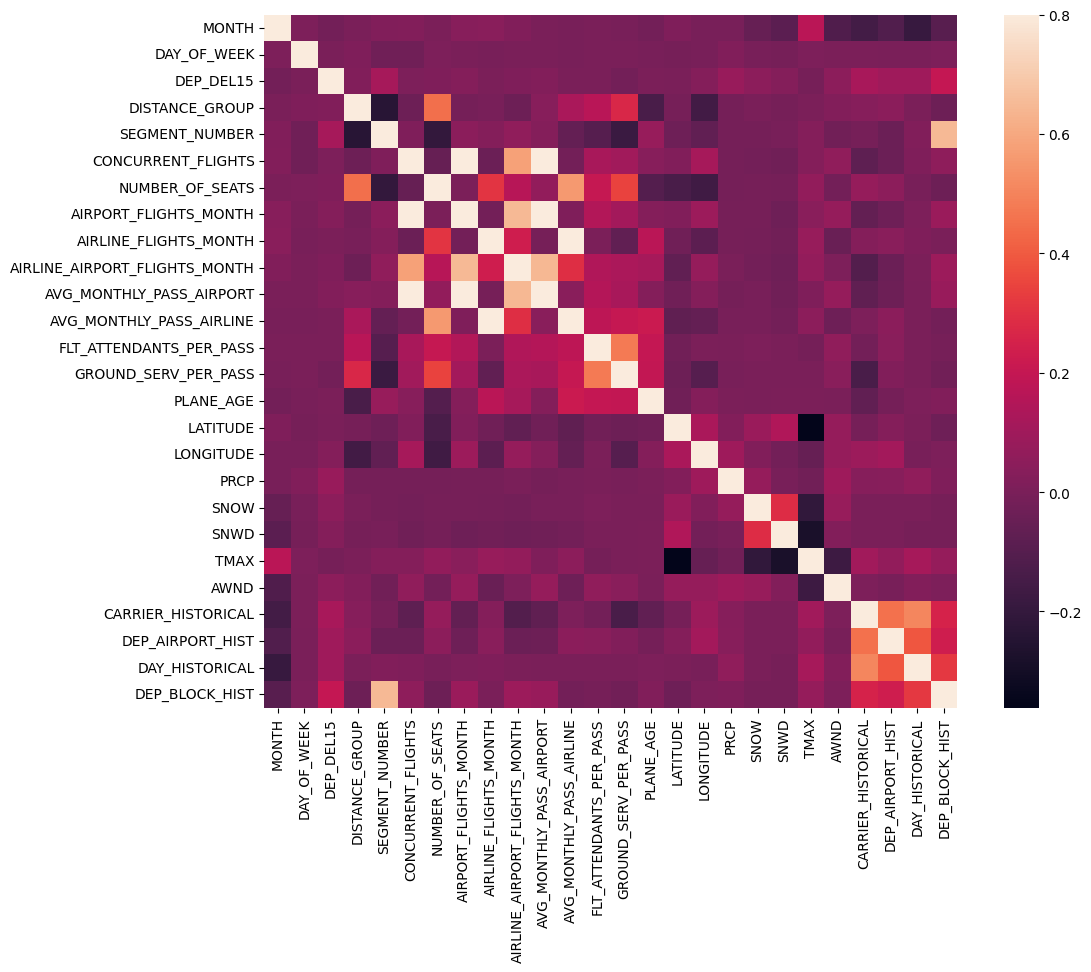

In [ ]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

Then we generate a bar plot to display the distribution of flights across different months.

In [ ]:
# Set seaborn style
sns.set(style="whitegrid")

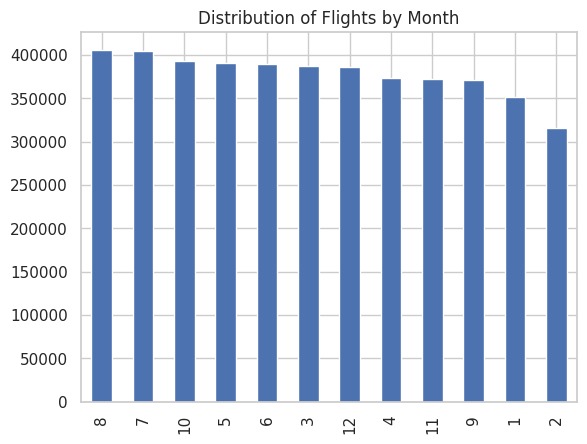

In [ ]:
df['MONTH'].value_counts().plot(kind='bar', title='Distribution of Flights by Month')
plt.show()

This code utilizes Seaborn to create a count plot, illustrating the distribution of flights for each day of the week.

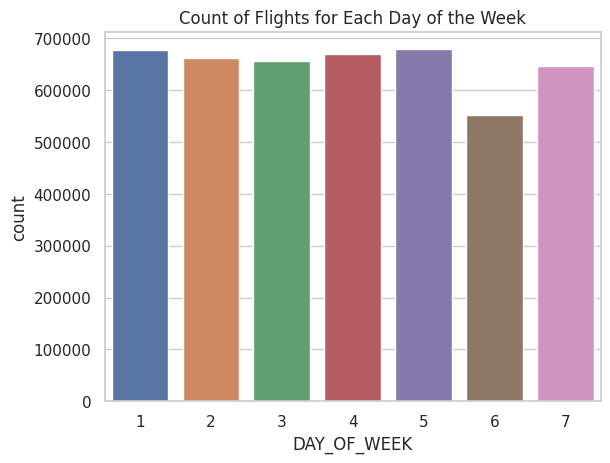

In [ ]:
sns.countplot(x='DAY_OF_WEEK', data=df)
plt.title('Count of Flights for Each Day of the Week')
plt.show()

### **Bar Chart**

This code generates a count plot using Seaborn to illustrate the distribution of flights based on the 'DEP_DEL15' column in the Pandas DataFrame (df)

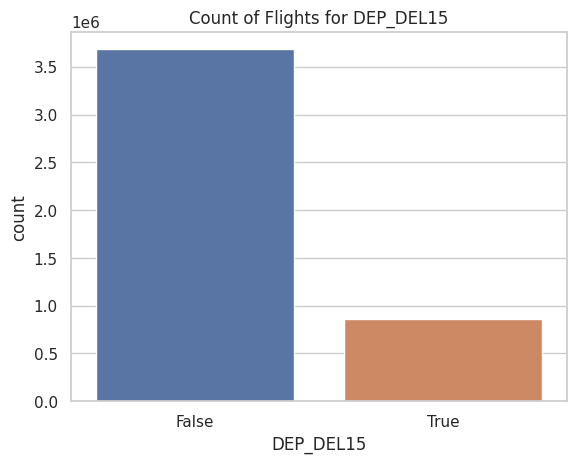

In [ ]:
sns.countplot(x='DEP_DEL15', data=df)
plt.title('Count of Flights for DEP_DEL15')
plt.show()

### **Scatter Plot**

In this section, a scatter plot is created using Seaborn to visualize the relationship between 'PLANE_AGE' and 'FLT_ATTENDANTS_PER_PASS' columns

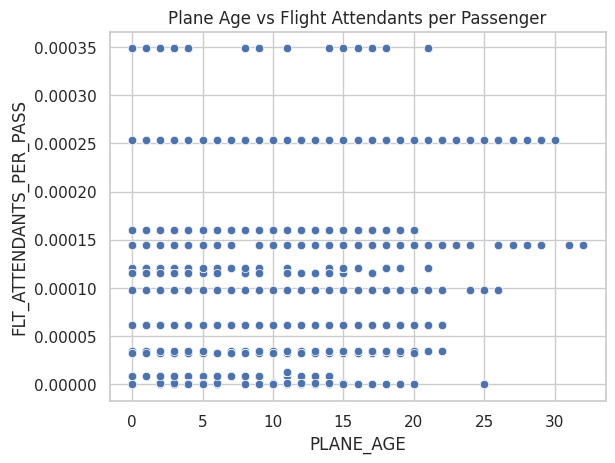

In [ ]:
sns.scatterplot(x='PLANE_AGE', y='FLT_ATTENDANTS_PER_PASS', data=df)
plt.title('Plane Age vs Flight Attendants per Passenger')
plt.show()

### **Box Plot**

Here, a box plot is created using Seaborn to display the distribution of 'PLANE_AGE' for each 'CARRIER_NAME

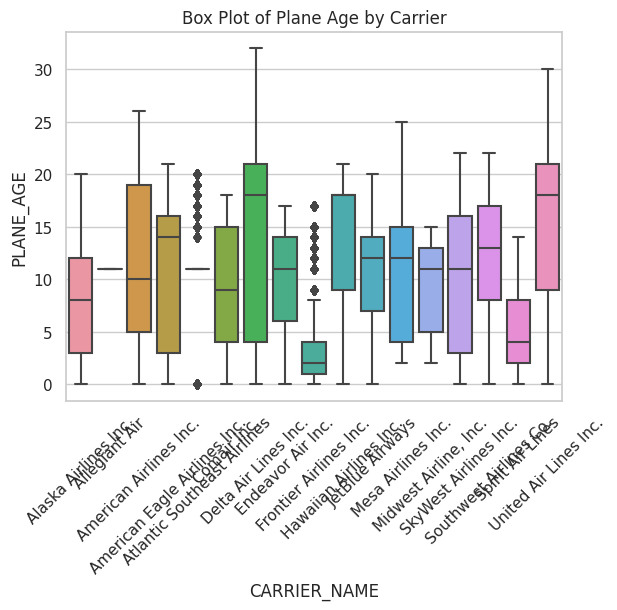

In [ ]:
sns.boxplot(x='CARRIER_NAME', y='PLANE_AGE', data=df)
plt.title('Box Plot of Plane Age by Carrier')
plt.xticks(rotation=45)
plt.show()

### **Heatmap**

This code generates a heatmap to visualize the correlation matrix of numerical columns

<ipython-input-32-9182d30b797e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


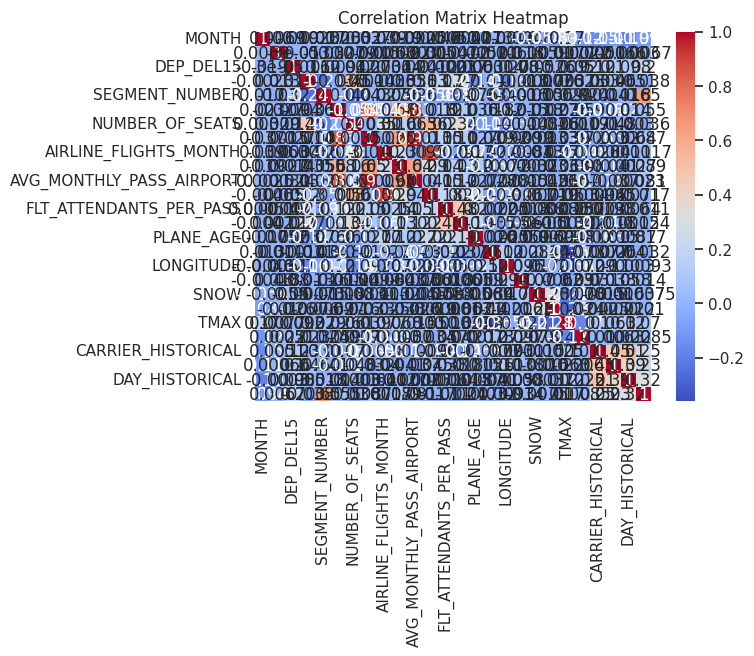

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

### **Scatter Plot**

This code generates a scatter plot to visualize the geospatial distribution of flights based on the 'LONGITUDE' and 'LATITUDE'

In [ ]:
import plotly.express as px

fig = px.scatter_geo(df, lat='LATITUDE', lon='LONGITUDE', color='DEP_DEL15',
                     hover_name='DEPARTING_AIRPORT', size='AIRPORT_FLIGHTS_MONTH')
fig.update_geos(projection_type="natural earth")
fig.show()


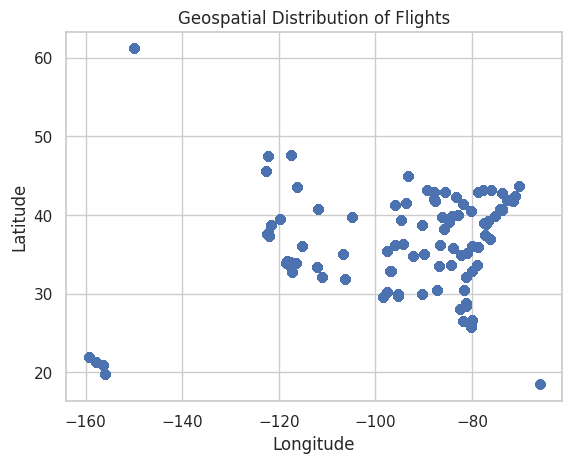

In [ ]:
plt.scatter(df['LONGITUDE'], df['LATITUDE'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geospatial Distribution of Flights')
plt.show()

### **Stacked Bar Plot**

This code creates a stacked bar plot using Seaborn to illustrate the count of departure delays ('DEP_DEL15') for each month.

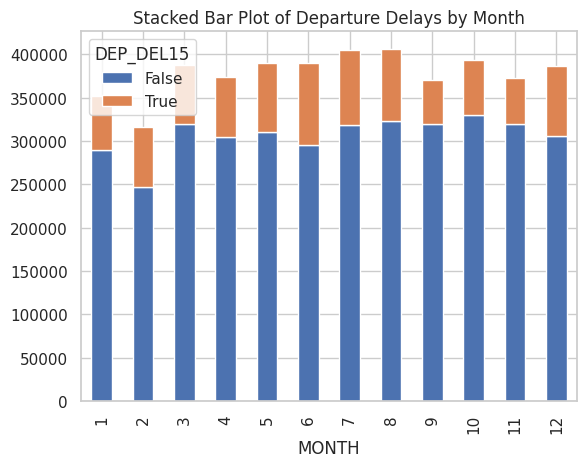

In [ ]:
df.groupby(['MONTH', 'DEP_DEL15']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Departure Delays by Month')
plt.show()

## **Asking and Answering Questions**
In the realm of data analysis and exploration, our project embarks on a journey to unravel insights from a substantial dataset using the powerful combination of Python's Pandas, Numpy, and Matplotlib/Seaborn libraries. The dataset, residing in a Pandas DataFrame, demands meticulous examination to extract meaningful patterns and trends.

** Q1: Which airline carrier consistently experiences the highest number of delays across its flights?**

In [ ]:
%%time

Carrier_count = df.CARRIER_NAME.value_counts().rename_axis('CARRIER_NAME').reset_index(name='count')
Carrier_count

CPU times: user 13.4 ms, sys: 1.68 ms, total: 15 ms
Wall time: 18.3 ms


,CARRIER_NAME,count
0,Southwest Airlines Co.,907076
1,Delta Air Lines Inc.,657062
2,American Airlines Inc.,632771
3,United Air Lines Inc.,420624
4,SkyWest Airlines Inc.,409126
5,"Midwest Airline, Inc.",210298
6,JetBlue Airways,188402
7,Alaska Airlines Inc.,167595
8,American Eagle Airlines Inc.,160390
9,Comair Inc.,153365


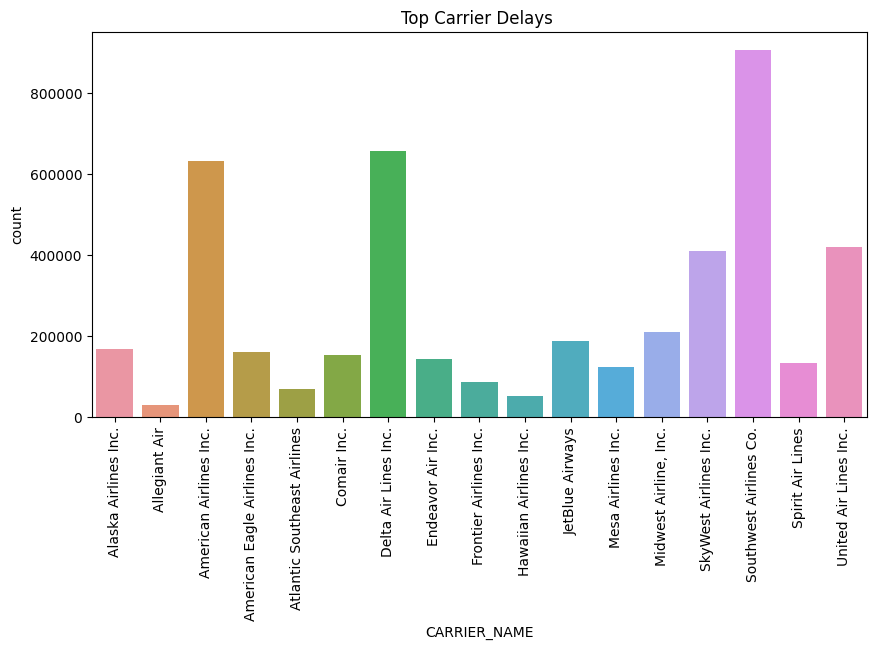

CPU times: user 326 ms, sys: 106 ms, total: 432 ms
Wall time: 392 ms


In [ ]:
%%time
plt.figure(figsize=(10,5))
sns.barplot(x='CARRIER_NAME', y='count',data=Carrier_count).set(title="Top Carrier Delays ")
plt.xticks(rotation='vertical')
plt.show()

**Q2: Which carrier has the best and worst average departure delays?**

In [ ]:
%time
df['DEP_DEL15'] = df['DEP_DEL15'].astype(float)

carrier_avg_delays = df.groupby('CARRIER_NAME')['DEP_DEL15'].mean().reset_index()
best_carrier = carrier_avg_delays.loc[carrier_avg_delays['DEP_DEL15'].idxmin()]
worst_carrier = carrier_avg_delays.loc[carrier_avg_delays['DEP_DEL15'].idxmax()]

print(f"The carrier with the best average departure delay is: {best_carrier['CARRIER_NAME']} ({best_carrier['DEP_DEL15']:.2f} minutes)")
print(f"The carrier with the worst average departure delay is: {worst_carrier['CARRIER_NAME']} ({worst_carrier['DEP_DEL15']:.2f} minutes)")


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.77 µs
The carrier with the best average departure delay is: Hawaiian Airlines Inc. (0.09 minutes)
The carrier with the worst average departure delay is: Frontier Airlines Inc. (0.26 minutes)


**Q3: Are there specific months or days of the week with higher average departure delays?**

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.2 µs


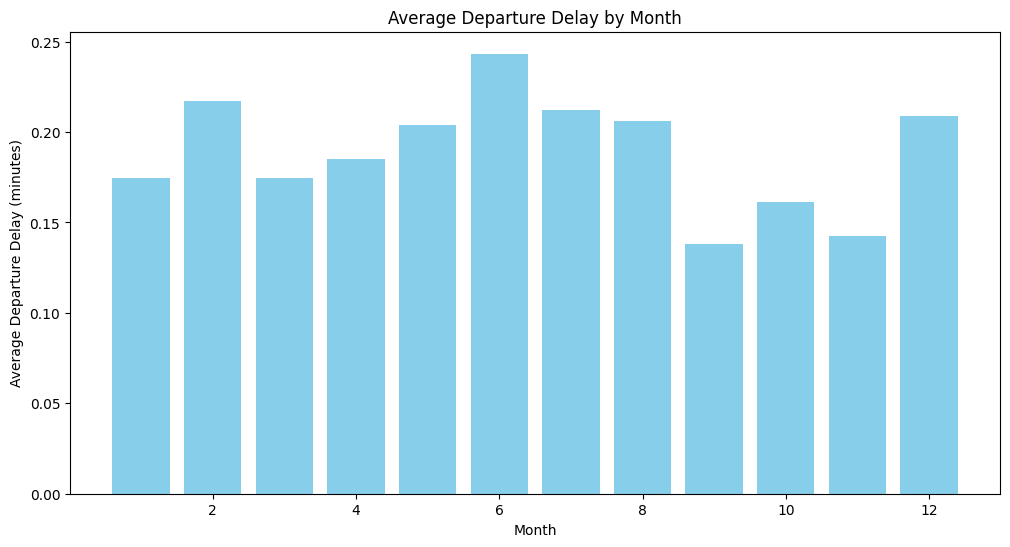

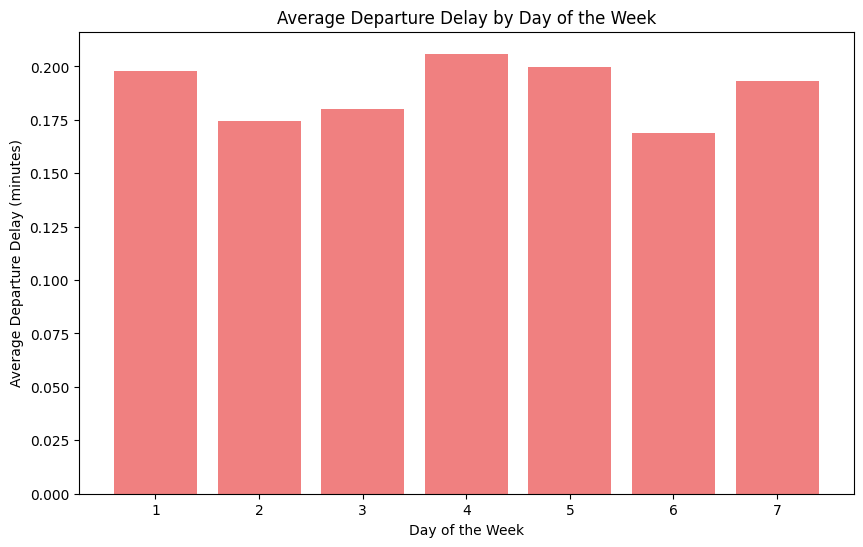

In [ ]:
%time
average_delay_by_month = df.groupby('MONTH')['DEP_DEL15'].mean().reset_index()


average_delay_by_day = df.groupby('DAY_OF_WEEK')['DEP_DEL15'].mean().reset_index()


plt.figure(figsize=(12, 6))
plt.bar(average_delay_by_month['MONTH'], average_delay_by_month['DEP_DEL15'], color='skyblue')
plt.title('Average Departure Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Departure Delay (minutes)')
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(average_delay_by_day['DAY_OF_WEEK'], average_delay_by_day['DEP_DEL15'], color='lightcoral')
plt.title('Average Departure Delay by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Departure Delay (minutes)')
plt.show()



**Q4: How does aircraft size (number of seats) relate to delays or other operational factors?**

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.68 µs


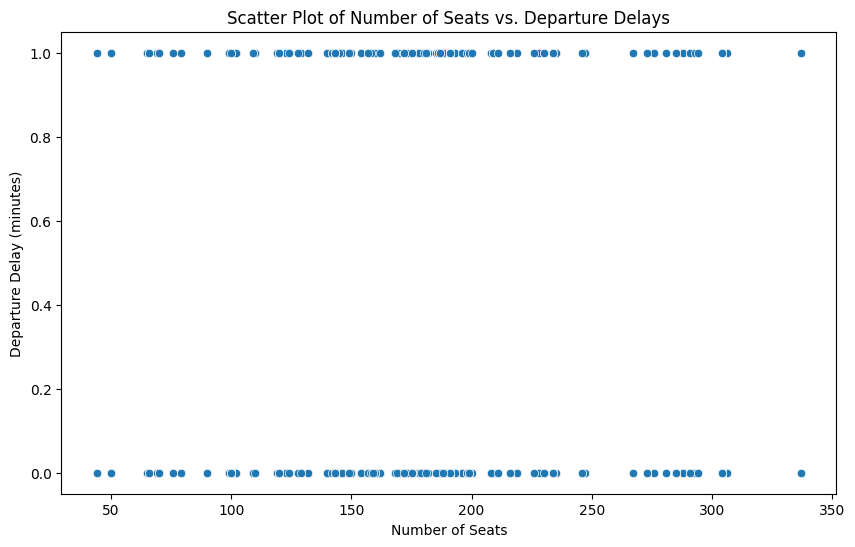

In [ ]:
%time

plt.figure(figsize=(10, 6))
sns.scatterplot(x='NUMBER_OF_SEATS', y='DEP_DEL15', data=df)
plt.title('Scatter Plot of Number of Seats vs. Departure Delays')
plt.xlabel('Number of Seats')
plt.ylabel('Departure Delay (minutes)')
plt.show()

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.2 µs


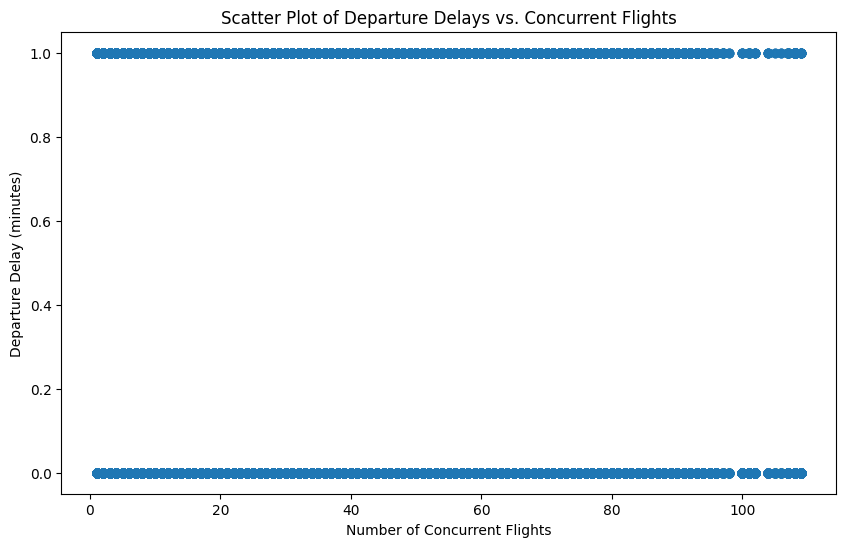

In [ ]:
%time
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['CONCURRENT_FLIGHTS'], df['DEP_DEL15'], alpha=0.5)
plt.title('Scatter Plot of Departure Delays vs. Concurrent Flights')
plt.xlabel('Number of Concurrent Flights')
plt.ylabel('Departure Delay (minutes)')
plt.show()

**Q5: Which airline has the most seats?**

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
The airline with the most seats is Southwest Airlines Co. with 136878651 seats.


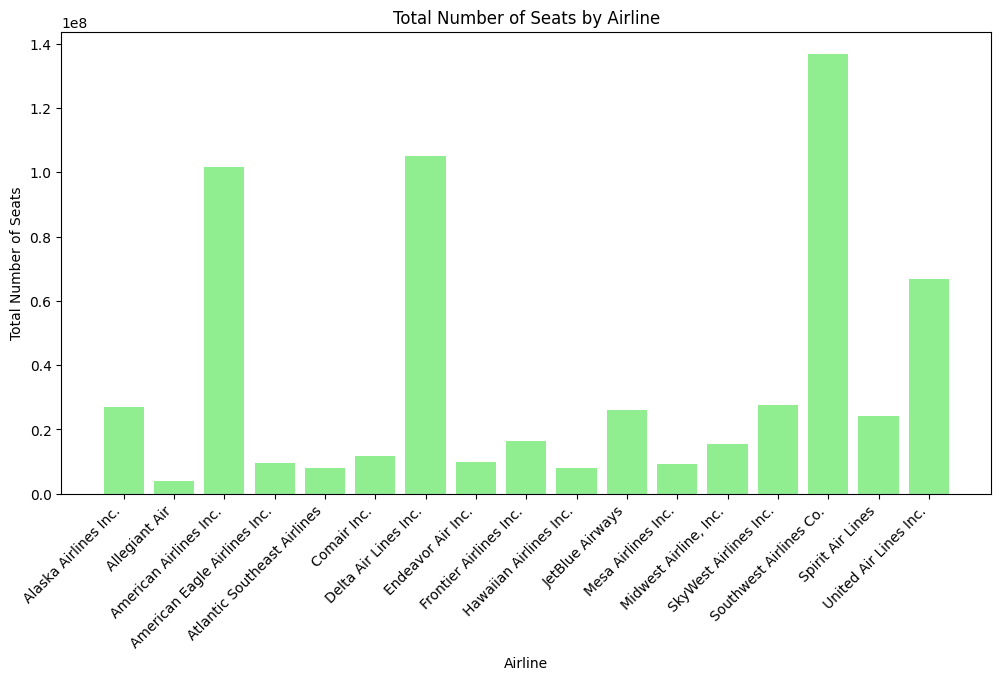

In [ ]:
%time
total_seats_by_airline = df.groupby('CARRIER_NAME')['NUMBER_OF_SEATS'].sum().reset_index()
most_seats_airline = total_seats_by_airline.loc[total_seats_by_airline['NUMBER_OF_SEATS'].idxmax()]
print(f"The airline with the most seats is {most_seats_airline['CARRIER_NAME']} with {most_seats_airline['NUMBER_OF_SEATS']} seats.")
plt.figure(figsize=(12, 6))
plt.bar(total_seats_by_airline['CARRIER_NAME'], total_seats_by_airline['NUMBER_OF_SEATS'], color='lightgreen')
plt.title('Total Number of Seats by Airline')
plt.xlabel('Airline')
plt.ylabel('Total Number of Seats')
plt.xticks(rotation=45, ha='right')
plt.show()


**Q6: Which Airline has the most number of domestic flights(less seats or smaller size of plane) ?**

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


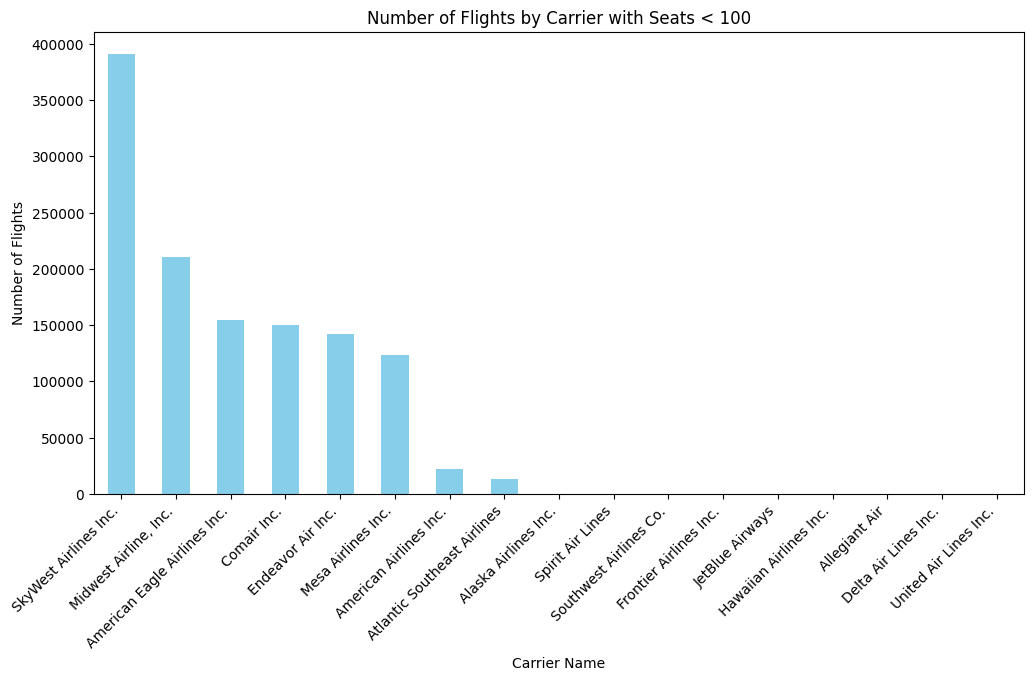

In [ ]:
%time
filtered_df = df[df['NUMBER_OF_SEATS'] < 100]
# Create a bar chart
plt.figure(figsize=(12, 6))
carrier_count = filtered_df['CARRIER_NAME'].value_counts()
carrier_count.plot(kind='bar', color='skyblue')
plt.title('Number of Flights by Carrier with Seats < 100')
plt.xlabel('Carrier Name')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45, ha='right')
plt.show()


## **Advantanges and Disadvantanges**

### **Advantanges using Pandas**
- **Ease of Use:* Pandas provides a high-level interface that is easy to understand and work with, making it accessible for users with varying levels of programming expertise.
- **Data Cleaning and Transformation:** Pandas offers a wide range of functions for cleaning and transforming data, which is crucial when dealing with massive datasets that may have inconsistencies or need preprocessing.
- **Data Alignment:** Ability to automatically align data based on labels, making it convenient for handling datasets with missing or misaligned data.

### **Disadvantanges using Pandas**
- **Memory Usage:** Handling massive datasets may lead to memory errors, especially on systems with limited RAM.
- **Performance:** While Pandas is generally fast for smaller datasets, its performance can suffer when dealing with massive datasets. Operations that involve iterating through large datasets can be slow compared to optimized solutions in lower-level languages like C or using distributed computing frameworks.

## **Conclusion**
After conducting exploratory data analysis (EDA) on the airline cancellation dataset using Pandas, it is easy to understand and work with, making it accessible for users with varying levels of programming expertise. Despite its many advantages, it is important to acknowledge that Pandas may face limitations when dealing with extremely large datasets that exceed available system memory.